> ### EEE2020: Data Structures & Algorithms

# Assignment \# IV: Searching & Sorting

<div style="text-align: right"> **Due date: May 21, 2021.** </div> 
<div style="text-align: right"> **Please upload your data @ LearnUs by 7 PM.** </div> 
<br>
<div style="text-align: right"> Daesung Jeon(전대성): <a href="mailto:ds.jeon@yonsei.ac.kr">ds.jeon@yonsei.ac.kr</a> 
<div style="text-align: right"> Hyekang Park(박혜강): <a href="mailto:hyekang.park@yonsei.ac.kr">hyekang.park@yonsei.ac.kr</a> </div>
</div>

-------------------------------


### *Assignment Instructions:*
1. Write a program implementing a particular algorithm to solve a given problem.
2. You can use both Korean and Engligh for your report.
3. **Analyze the algorithm theoretically and empirically, and write discussion.** 
4. **Report your results.**  
    - You must do assignments and labs yourself. 
    - <span style="color:red">**Do not copy any part of your friends’ code.**</span>
    - Otherwise, you will get a F grade.

-----------------

<h2><span style="color:blue">[2016145101] [안장환]</span> </h2>

In [116]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2021-05-21 18:46:47.814352


In [117]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


-------------------------------

### PROBLEM I - Sorting (20 POINTS)

#### 1. Sorting 함수들을 구현하려 한다. 다음 조건들을 만족하는 ```bubble sort```, ```merge sort```, ```insertion_sort```, ```shell sort```,  ```quick sort```를 구현하시오. (5점)
> * ```sort_list``` 와 ```func```를 인자로 받는다. ```sort_list```는 실수를 원소로 하는 정렬 되지 않은 리스트이고, ```func```는 실수 값을 입력 받아 또 다른 실수 값을 반환하는 함수이다.
> * 정렬된 ```sort_list```를 반환한다.
> * ```func```가 반환하는 값을 기준으로 내림차순 정렬한다.
>> * ```func```의 예시 : ```lambda x : x + 1```



#### NOTE
- 외부 라이브러리는 사용하지 않는다(사용 시 해당 문항 0점).
- ```###CODE HERE###``` 이외의 코드를 수정하지 않는다.
- ```###CODE HERE###``` 중 설명이 필요한 부분에 주석을 단다. 
- Discussion에 알고리즘이 어떻게 동작하는지 설명한다.

In [118]:
### CODE HERE ###

def bubble_sort(sort_list, func):
    for i in range(len(sort_list)-1,0,-1):
        for j in range(i):
            if func(sort_list[j]) < func(sort_list[j+1]):
                temp=sort_list[j+1]
                sort_list[j+1]=sort_list[j]
                sort_list[j]=temp

def merge_sort(sort_list, func):
    if len(sort_list)>1:
        mid = len(sort_list)//2
        left_half=sort_list[:mid]
        right_half=sort_list[mid:]
        
        merge_sort(left_half,func)
        merge_sort(right_half,func)
        
        i=0
        j=0
        k=0
        
        while i< len(left_half) and j<len(right_half):
            if func(left_half[i]) > func(right_half[j]):
                sort_list[k]=left_half[i]
                i=i+1
            else:
                sort_list[k]=right_half[j]
                j=j+1
            k=k+1
        
        while i <len(left_half):
            sort_list[k]=left_half[i]
            i=i+1
            k=k+1
        
        while j< len(right_half):
            sort_list[k]=right_half[j]
            j=j+1
            k=k+1
            
def insertion_sort(sort_list, func):
    for i in range(1,len(sort_list)):
        insert = sort_list[i]
        pos = i
        while func(insert) >= func(sort_list[pos-1]) and pos >0:
            sort_list[pos]=sort_list[pos-1]
            pos-=1
            
        sort_list[pos]=insert
        
def gap_insertion_sort(sort_list, start, gap, func):
    for i in range(start+gap, len(sort_list), gap):
        current_value = sort_list[i]
        position = i
        
        while position >=gap and func(sort_list[position-gap]) <= func(current_value):
            sort_list[position]=sort_list[position-gap]
            position=position-gap
            
        sort_list[position]=current_value
        
def shell_sort(sort_list, func):
    sublist_count =len(sort_list)//2
    while sublist_count>0:
        for start_position in range(sublist_count):
            gap_insertion_sort(sort_list, start_position, sublist_count,func)
        sublist_count=sublist_count//2
        
def _quick_sort_helper(sort_list, first, last, func):
    if first < last:
        
        split_point = _partition(sort_list, first, last,func)
        
        _quick_sort_helper(sort_list, first, split_point - 1, func)
        _quick_sort_helper(sort_list, split_point + 1, last, func) 
        
def _partition(sort_list, first, last, func):
    pivot_value = sort_list[first] 
    left_mark = first + 1 
    right_mark = last
    done = False
    
    while not done:
        while left_mark <= right_mark and func(sort_list[left_mark]) >= func(pivot_value):
            left_mark = left_mark + 1
            
        while func(sort_list[right_mark]) <= func(pivot_value) and right_mark >= left_mark:
            right_mark = right_mark - 1
            
        if right_mark < left_mark: 
            done = True
        else:
            temp = sort_list[left_mark] 
            sort_list[left_mark] = sort_list[right_mark] 
            sort_list[right_mark] = temp
            
    temp = sort_list[first]
    sort_list[first] = sort_list[right_mark]
    sort_list[right_mark] = temp
    
    return right_mark

def quick_sort(sort_list, func):
    _quick_sort_helper(sort_list, 0, len(sort_list) - 1,func)

#################

### Describe and Discuss your answer

- bubble_sort: 1 ~ n, 1 ~ (n-1), 1 ~ (n-2)...로 오른쪽 항과 비교를 하며 작은 func(data)의 결과값을 갖는 data를 가장 오른쪽으로 보내준다.
- merge_sort: list를 이등분으로 나누어주며 가장 작은 단위부터 내림차순으로 정렬하며 recursive하게 다시 합쳐준다.
- insertion_sort: list에서 index를 증가시키며 왼쪽의 sublist와 비교해 비교기준이 되는 값보다 작은 것들은 list에서 한 칸씩 오른쪽으로 보내주고 큰 값 앞에서 멈추어 정렬해준다.. 
- shell_sort: list에서 gap을 주어 만든 sublist들에 대하여 insertion sort를 진행하고, gap을 줄여나가며 tunning해간다. 값은 func를 지난 함수값을 기준으로 비교한다.
- quick_sort: pivot value를 사용하여 pivot이 sorting후 최종위치한 split point를 기준(왼쪽 > pivot, 오른쪽<pivot)으로 list를 나눠주고, recursive하게 진행한다.


#### 2. Sorting 함수들의 complexity를 비교하려 한다. 다음 조건을 만족하는 ```compute_sorting_time()``` 함수를 구현하시오. (5점)
> * $N = 100, 200, ... , 1000$일 때 각 정렬함수의 수행 시간 그래프를 `matplotlib`을 이용하여 line plot으로 나타낼 것.
> * x축을 $N$, y축을 정렬 시간으로 할 것. 
> * ```_compute_time(func)``` 함수는 정렬 함수를 입력으로 받아 $N = 100, 200, ... , 1000$ 일때의 수행시간 list를 반환한다.

#### HINT
1. ```random.sample``` 함수를 이용하여 임의의 수열을 생성한다.

#### NOTE
- 명시된 라이브러리 이외에는 사용하지 않는다(사용 시 해당 문항 0점).
- ```###CODE HERE###``` 이외의 코드를 수정하지 않는다.
- ```###CODE HERE###``` 중 설명이 필요한 부분에 주석을 단다. 
- Discussion에 각 정렬함수의 complexity를 설명한다.

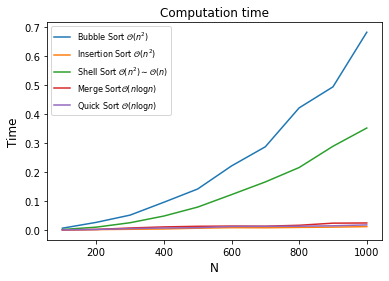

In [119]:
def _compute_time(func):
    import time
    import random
    ### CODE HERE ###
    test_list_set=[None]*1000
    time_list=[]
    
    for i in range(1000):
        test_list_set[i]=i
    
    for size in range(100, 1100, 100):
        test_list = random.sample(test_list_set,size)
        
        start_time=time.time()
        func(test_list,lambda x:x**2-2*x+10)
        end_time=time.time()
        time_list.append(end_time-start_time)
    #################
    return time_list

def compute_sorting_time():
    import matplotlib.pyplot as plt
    ### CODE HERE ###
    
    plt.plot([x for x in range(100,1100,100)], _compute_time(bubble_sort))
    plt.plot([x for x in range(100,1100,100)], _compute_time(merge_sort))
    plt.plot([x for x in range(100,1100,100)], _compute_time(insertion_sort))
    plt.plot([x for x in range(100,1100,100)], _compute_time(shell_sort))
    plt.plot([x for x in range(100,1100,100)], _compute_time(quick_sort))
    plt.xlabel('N', fontsize=12)
    plt.ylabel('Time', fontsize=12)
    plt.title('Computation time', fontsize = 12)
    plt.legend(['Bubble Sort $\mathcal{O}(n^2)$', 'Insertion Sort $\mathcal{O}(n^2)$', 
                'Shell Sort $\mathcal{O}(n^2) \sim \mathcal{O}(n)$', 'Merge Sort$\mathcal{O}(n\log n)$', 'Quick Sort $\mathcal{O}(n \log n)$'], 
                loc='best', fontsize=8);
    plt.show()
    #################


compute_sorting_time()

### Describe and Discuss your answer

- 각 sorting function이 인자로 받는 func는 lambda x:x**2-2*x+10 로 임의로 지정해주었다.

- O(n) comparision
- bubble_sort: O(n^2)
- insertion_sort: O(n^2)
- merge_sort: O(nlogn)
- shell_sort:O(n)~O(n^2)
- quick_sort: O(nlogn)

___

#### 3. 2018 평창 동계 올림픽 순위를 구하려고 한다. 다음 조건들을 만족하는 ```sort_medals()``` 함수를 구현하시오. (10점)
> * ```medals.csv``` 파일로 부터 데이터를 받아, **금메달 우선 순위 방식으로 정렬**한 뒤 **pandas.DataFrame**의 형태로 반환한다.
> * **Problem I-1**에서 구현한 ```quick_sort()```함수를 1번만 사용하여 정렬한다. 

#### HINT
1. extreme case에 대해서는 가정하지 않는다. (e.g. 금메달 1개 은메달 0개 vs 금메달 0개, 은메달 1000000개) 
2. ```pd.read_csv('./medals.csv').values.tolist()``` 를 이용하여 csv 파일을 읽고 리스트로 변환한다.
3. **pandas.DataFrame**에 관한 내용은 다음 [링크](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)를 참조한다.


#### NOTE
- 명시된 라이브러리 이외에는 사용하지 않는다(사용 시 해당 문항 0점).
- numpy는 리스트를 numpy array로 바꾸는 것 이외에 사용하지 않는다.
- pandas는 파일을 읽고 리스트로 바꿀 때, 정렬된 리스트를 **pandas.DataFrame**의 형태로 바꿀 때 이외에 사용하지 않는다.
- ```###CODE HERE###``` 이외의 코드를 수정하지 않는다.
- ```###CODE HERE###``` 중 설명이 필요한 부분에 주석을 단다. 
- Discussion에 알고리즘이 어떻게 동작하는지 설명한다.

In [120]:
def sort_medals(): # 12
    import pandas as pd
    import numpy as np
    values = pd.read_csv('./medals.csv').values.tolist()
    ### CODE HERE ###
    from IPython.display import display, HTML
    quick_sort(values, lambda x: x[1]) 
    display(pd.DataFrame(np.array(values),columns=['국가','금메달','은메달','동메달']))   

    #################

sort_medals()

,국가,금메달,은메달,동메달
0,독일,14,10,7
1,노르웨이,14,14,11
2,캐나다,11,8,10
3,미국,9,8,6
4,네덜란드,8,6,6
5,스웨덴,7,6,1
6,오스트리아,5,3,6
7,프랑스,5,4,6
8,스위스,5,6,4
9,대한민국,5,8,4


### Describe and Discuss your answer

- quick_sort에 func 인자를 "lambda x: x[1]" 로 넘겨주었다. 금메달 우선순위 비교이기 때문에 index=1 인 값(금메달 수)을 기준으로 내림차순을 정렬하게 된다.

___

### PROBLEM II - Sorting & Unoredered List (30 POINTS)

#### Node로 이루어진 Unordered list를 merge sort 방식으로 정렬하려 한다. 주어진 ```File```와 ```Node``` class를 이용하여 다음 조건들을 만족하는 ```UnorderedList``` class를 완성하시오. (30점)
* ```File``` class는 이름과 생성 날짜를 instance variable로 가진다. 
* ```Node``` class는 ```self.data``` 와 ```self.next```를 instance variable로 가진다. ```self.data```에는 ```File``` class의 인스턴스를 저장하고 ```self.next```에는 다른 노드를 저장한다.
* ```UnorderedList``` class는 ```self.head``` 와 ```self.metric```을 instance variable로 가진다. ```self.head```는 연결된 노드들 중 제일 앞의 노드를 저장한다. ```self.metric```은 ```merge_sort(self, metric)``` method에서 인자로 받아 어떤 metric을 사용할지 저장한다. ```__init(self)__```, ```append(self, item)```, ```merge_sort(self, metric)```, ```__repr(self)__```은 미리 구현되어 있으며 merge sort를 수행하는 부분은 다음과 같다.
> * ```merge_sort(self, metric)``` : ```metric``` 은 ```File```의 **이름** 또는 **생성 날짜**가 될 수 있다. 해당 ```metric```에 대하여 오름 차순으로 ```merge_sort_helper```를 이용하여 merge sort를 수행한다. 
> * ```merge_sort_helper(self, new_head)``` : 최초로 ```self.head```를 입력으로 받아 recursive하게 merge sort를 수행한 뒤 정렬된 ```UnorderedList```의 ```new_head```를 반환한다. 
> * ```get_middle(self, new_head)``` : ```UnorderedList``` 안에서 부분 혹은 전체의 link된 노드들의 head를 입력으로 받아 중간 노드를 반환한다. 
* 정렬할 때 노드를 제외한 다른 데이터 구조를 사용할 수 없다(e.g. list, dictionary).
* 정렬하는 동안 ```Node``` 클래스의 인스턴스 생성이나 deepcopy는 할 수 없다. 


#### HINT
1. ```UnorderedList```의 정렬이 되지 않은 linked node들을 다 분리(Divide)한 뒤 합져주는 과정에서 정렬(Conquer & Combine)한다.
2. **Divide -> Conquer & Combine**의 과정 중 **Conquer & Combine**을 recursive function을 사용하여 구현할 수 있다(권장). 만약 사용할 경우 다른 method를 ```###CODE HERE###``` 이외에 작성할 수 있다.

#### NOTE
- 명시된 라이브러리 이외에는 사용하지 않는다(사용 시 해당 문항 0점).
- ```###CODE HERE###``` 이외에 다른 하나의 method를 구현할 수 있다. 그러나 미리 작성된 코드를 수정할 수 없다.
- 작성한 코드들 중 설명이 필요한 부분에 주석을 단다. 
- Discussion에 알고리즘이 어떻게 동작하는지 설명한다.



In [121]:
from assignment4_ import File, UnorderedList

In [122]:
import random
import string

sort_list = UnorderedList()
str_list = string.ascii_uppercase

for i in range(10):
    random_name = ''.join(random.choices(str_list, k=1)) + str(random.randint(1,20))
    sort_list.append(File(random_name))
    

print(sort_list)
sort_list.merge_sort('name')
print(sort_list)
sort_list.merge_sort('date')
print(sort_list)

[Y10, H20, X17, A1, A8, E3, F12, R11, F7, A18]
[A1, A18, A8, E3, F12, F7, H20, R11, X17, Y10]
[Y10, H20, X17, A1, A8, E3, F12, R11, F7, A18]


### Describe and Discuss your answer

- get_middle : Node를 한 칸씩 옮겨가는 one_step과, 두 칸씩 옮겨가는 two_step을 정의해주었다. two_step이 None이 되는 경우 one_step의 위치가 middle node이다.
- merge_sort : 비교 기준이 되는 metric을 정의하고, merge_sort_helper를 통해 Node가 정렬된 후 head를 self.head로 정의해준다.
- merge_sort_helper : get_middle을 활용해 middle Node를 기준으로 left, right으로 나누어주고 각각에 대해 recursive하게 실행해준다. merge_sort_helper2 를 활용해 left와 right를 merge sort해주고 head를 return 받는다.
- merge_sort_helper2 : merge_sort function에서 정의된 metric을 기준으로 Node.data.name(or date)를 비교해 Node를 오름차순 정렬해준다.

___

### PROBLEM III - Searching (50 POINTS)

#### 1. Collision resolution을 위해 chaining을 사용하는 HashTable을 구현하려 한다. 다음 조건들을 만족하는 HashTable를 구현하시오 (15점)
* **Chaining**이란 주어진 key 값에 대응하는 hash address가 고정되는 close addressing 방법 중의 하나이다. Collision이 발생한 key들을 리스트를 이용해 저장하고 각 리스트를 chain이라 부른다. Chain 길이의 평균은 Load factor(요소의 수/Table의 크기)와 같다. Chaining을 이용한 collision resolution을 수행하는데 고려해야 할 점은 다음과 같다.
> * ```self.slots```, ```self.data```는 ```size``` 길이의 ```Empty list``` 로 초기화된 리스트를 사용한다.
> * ```put``` 할 때 요소의 수가 ```self.size```와 같으면(load factor = 1) HashTable의 크기를 2배로 늘리고 모든 데이터를 다시 hashing한다.
 
* 구현해야 할 Methods들은 다음과 같다.
> * ```__init__(self, size) ``` : Empty HashTable을 생성한다.
>> * ```self.slots```, ```self.data```는 ```size``` 길이의 ```Empty list``` 로 초기화된 리스트를 사용한다.
>> * ```self.num_collision```은 collision이 발생할 때마다 값을 증가시켜준다.
>> * 현재 요소의 수는 ```self.num_element```에 저장한다
> * ```hash_func(self, key) ``` : key값을 입력으로 받아 해당 hash value를 반환한다.
> * ```_resize(self)``` : HashTable의 크기를 2배로 늘리고 모든 데이터를 다시 hashing한다.
> * ```put(self, key, data) ``` : key, data 쌍을 받아 key의 hash value를 계산한 뒤 해당 값을 index로 ```self.slots```, ```self.data```의 list에 저장한다. 요소의 수가 ```self.size```와 같으면(load factor = 1) resizing한다.
> * ```get(self, key) ``` : 입력받은 key에 대응하는 data를 반환한다. 없을 경우 에러 메시지를 출력한다.
> * ```remove(self, key) ``` : 입력받은 key에 대응하는 key, data 쌍을 삭제한다. 없을 경우 에러 메시지를 출력한다.
> * ```__getitem__(self, key) ``` : HashTable에 []연산자를 통해 접근할 수 있도록 한다. 
> * ```__setitem__(self, key, data)  ``` : HashTable에 []연산자를 통해 값을 입력할 수 있도록 한다.
> * ```__delitem__(self, key) ``` : del a[] 를 사용할 수 있도록 한다.
> * ```__len__(self) ``` : HashTable의 key, data 쌍의 갯수를 len을 통해 출력할 수 있도록 한다.
> * ```__contains__(self, key) ``` : 해당 key를 ```in``` keyword를 통해 찾을 수 있도록 한다.
> * ```keys(self) ``` : key 값들의 list를 반환한다.
> * ```values(self) ``` : data 값들의 list를 반환한다.



#### NOTE
- 외부 라이브러리는 사용하지 않는다(사용 시 해당 문항 0점).
- ```###CODE HERE###``` 이외의 코드를 수정하지 않는다.
- ```###CODE HERE###``` 중 설명이 필요한 부분에 주석을 단다. 
- Discussion에 알고리즘이 어떻게 동작하는지 설명하고 ```put(self, key, data) ```, ```get(self, key) ```, ```remove(self, key) ```의 complexity를 분석한다.

In [123]:
a=[[] for _ in range(10)]
a[0].append(1)
a[0].append(2)
print(a)
num_empty_slot=0
        
for i in range(len(a)):
    if len(a[i])==0:
        num_empty_slot+=1
        
print(num_empty_slot)

[[1, 2], [], [], [], [], [], [], [], [], []]
9


In [124]:
from assignment4 import HashTable_Chain

In [125]:
hash_table = HashTable_Chain(size = 11)
hash_table[3] = 'a'
hash_table[9] = 'b'
hash_table[15] = 'c'
hash_table[21] = 'd'
hash_table[27] = 'e'
hash_table[8] = 'f'
print(hash_table.keys())
print(hash_table.values())
print(hash_table[3], hash_table[9], hash_table[15], hash_table[21], hash_table[27], hash_table[8])
hash_table[999]
del hash_table[3]
print(hash_table.keys())
print(hash_table.values())
print(3 in hash_table)
del hash_table[999]
print(len(hash_table))



[3, 15, 27, 8, 9, 21]
['a', 'c', 'e', 'f', 'b', 'd']
a b c d e f
No corresponding key
[15, 27, 8, 9, 21]
['c', 'e', 'f', 'b', 'd']
False
No corresponding key
5


### Describe and Discuss your answer

- hash_func(self,key): key값을 인자로 받을 때, key값을 self.size로 나누어주어 hash_value생성
- put(self,key,data): load factor가 1이 아닐 때,self.slots와 self.data에 hash_value를 통해 append해주고 num_element를 1 증가시킨다. load factor가 1이면 self._resize()를 실행한다. key-value pair에 대해 한 번씩 실행해주면 되므로 O(1)이다.
- get(self,key): hash_value를 통해 속하는 chain이 있는 곳 까지는 O(1)이다. chain에서 key에 해당하는 chain_index를 찾고 이를 통해 value를 찾는다. chain_index를 찾는 과정은 linear하게 하나씩 증가시키며 비교하기 때문에 O(n)이다. 따라서 전체적으로 O(n)이다.
- remove(self, key): get과 같은 과정을 거치고, del을 통해 해당하는 key와 value pair를 삭제해준다. 따라서 O(n).


___

#### 2. Collision resolution을 위해 Double Hashing을 사용하는 HashTable을 구현하려 한다. 다음 조건들을 만족하는 HashTable를 구현하시오 (25점)
* **Double Hashing**이란 주어진 key 값에 대응하는 hash address가 고정되지 않는 open addressing 방법 중의 하나이다. 즉, collision resolution을 multiple postion을 probe함으로써 해결하는데 그 이동폭으로써 또 다른 hash function을 사용한다. Double Hashing을 이용한 collision resolution을 수행하는데 고려해야 할 점은 다음과 같다.
> * ```self.slots```, ```self.data```는 ```size``` 길이의 ```None``` 으로 초기화된 list를 사용한다.
> * 다음의 식으로 probing을 진행한다. ```(hash1(key) + i * hash2(key)) % TABLE_SIZE```. 만약 ```hash2(key)=1``` 이라면 linear probing과 같다. 
> * Probing에 사용되는 ```hash2(key)``` 은 0보다 큰 값을 반환해야 한다.
> * ```hash2(key)```가 반환하는 값이 Table size와 서로소이고 Table size가 prime number일 때 모든 address를 probe할 수 있다. **Why?**
> * ```put``` 할 때 요소의 수가 ```self.size```의 0.75보다 크거나(load factor > 0.75) probing 횟수가 ```self.size```와 같으면 HashTable의 크기를 2배로 늘리고 모든 데이터를 다시 hashing한다.
> * ```get```, ```remove```할 때 probing 횟수가 ```self.size```와 같으면 해당 key가 없다고 판단한다. 
> * ```remove``` 할 때 ```None``` 대신 ```'Delete'```로 marking 해준다. **Why?**

* 구현해야 할 Methods들은 다음과 같다.
> * ```__init__(self, size) ``` : Empty HashTable을 생성한다. 
>> * ```self.slots```, ```self.data```는 ```size``` 길이의 ```None``` 으로 초기화된 list를 사용한다.
>> * ```self.num_collision```은 collision이 발생할 때마다 값을 증가시켜준다. 이 때 probing할 때 발생하는 collision도 횟수에 포함시킨다.
>> * 현재 요소의 수는 ```self.num_element```에 저장한다
> * ```hash_func1(self, key)``` : key값을 입력으로 받아 해당 hash value를 반환한다.
> * ```hash_func2(self, key)``` : key값을 입력으로 받아 해당 hash value를 반환한다.
> * ```_resize(self)``` : HashTable의 크기를 2배로 늘리고 모든 데이터를 다시 hashing한다.
> * ```put(self, key, data) ``` : key, data 쌍을 받아 key의 hash value를 계산한 뒤 해당 값을 index로 ```self.slots```, ```self.data```의 list에 저장한다. 요소의 수가 ```self.size```의 0.75보다 크거나(load factor > 0.75) probing 횟수가 ```self.size```와 같으면 resizing한다.
> * ```get(self, key) ``` : 입력받은 key에 대응하는 data를 반환한다. Probing 횟수가 ```self.size```와 같으면 해당 key가 없다고 판단한다. 없을 경우 에러 메시지를 출력한다.
> * ```remove(self, key) ``` : 입력받은 key에 대응하는 key, data 쌍을 삭제한 후 ```'Delete'```로 marking 해준다. Probing 횟수가 ```self.size```와 같으면 해당 key가 없다고 판단한다. 없을 경우 에러 메시지를 출력한다.
> * ```__getitem__(self, key) ``` : HashTable에 []연산자를 통해 접근할 수 있도록 한다. 
> * ```__setitem__(self, key, data)  ``` : HashTable에 []연산자를 통해 값을 입력할 수 있도록 한다.
> * ```__delitem__(self, key) ``` : del a[] 를 사용할 수 있도록 한다.
> * ```__len__(self) ``` : HashTable의 key, data 쌍의 갯수를 len을 통해 출력할 수 있도록 한다.
> * ```__contains__(self, key) ``` : 해당 key를 ```in``` keyword를 통해 찾을 수 있도록 한다.
> * ```keys(self) ``` : key 값들의 list를 반환한다.
> * ```values(self) ``` : data 값들의 list를 반환한다.


#### NOTE
- 외부 라이브러리는 사용하지 않는다(사용 시 해당 문항 0점).
- ```###CODE HERE###``` 이외의 코드를 수정하지 않는다.
- ```###CODE HERE###``` 중 설명이 필요한 부분에 주석을 단다. 
- Discussion에 알고리즘이 어떻게 동작하는지와 linear probing과 quadratic probing의 문제점을 설명하고 이를 어떻게 해결했는지 작성한다. 또한 문제 설명의 **Why?** 에 대한 답을 작성한다. 



In [126]:
from assignment4_ajh import HashTable_DoubleHash

In [127]:
hash_table = HashTable_DoubleHash(size = 11)
hash_table[3] = 'a'
hash_table[9] = 'b'
hash_table[15] = 'c'
hash_table[21] = 'd'
hash_table[27] = 'e'
hash_table[8] = 'f'
print(hash_table.keys())
print(hash_table.values())
print(hash_table[3], hash_table[9], hash_table[15], hash_table[21], hash_table[27], hash_table[8])
hash_table[999]
del hash_table[3]
print(hash_table.keys())
print(hash_table.values())
print(3 in hash_table)
del hash_table[999]
print(len(hash_table))




[3, 15, 27, 8, 9, 21]
['a', 'c', 'e', 'f', 'b', 'd']
a b c d e f
No corresponding key
[15, 27, 8, 9, 21]
['c', 'e', 'f', 'b', 'd']
False
No corresponding key
5


### Describe and Discuss your answer

- hash_func1(self, key) : start_index의 값을 만들어 가장 처음 probe할 hash value를 만들어낸다.]
- hash_func2(self, key) : self.size가 홀수일 경우와 짝수일 경우로 나누어 self.size보다 작은 수 중 가장 큰 소수를 구하였다. 그 후 hash_value로 hash2(key)=prime-(key%prime)을 정의하였다. 이렇게 Table size와 서로소가 되도록 hash2(key)를 정의해주면 collision이 일어나지 않는다.
- put(self, key, data): hash_func1,2를 통해 구한 hash_value값들과 (hash1(key) + i * hash2(key)) % TABLE_SIZE의 식을 활용해 probing을 진행한다.load_factor가 0.75보다 크거나 진행 중 probing 횟수가 self.size와 같게 되면 self._resize()를 실행한다.
- get(self, key) : put과 유사한 방법으로 진행 후, key값을 구했을 때의 index를 활용해 data list에서 value를 출력한다.
- remove(self, key): 위와 같이 진행 후, slots와 data list에서 해당 값들을 'Delete'로 바꿔준다.
- liear probing은 clustering의 문제가, quadratic probing은 모든 slot을 확인하지 않을 수 있다는 문제가 있다. 위 문제에서는 self.size와 서로소인 gap을 선정하는 방식으로 문제를 해결했다. 이처럼 하면 모든 slot을 검사하여 memory를 효율적으로 사용할 수 있다.

___

#### 3. 위에서 구현한 두 HashTable의 collision resolution을 평가하고 chaining을 사용했을 때 chain 길이의 분포를 확인하려 한다. 다음 조건을 만족하는 graph와 histogram을 그리시오. (10점)
1. ```plot_collision()``` 함수에서 두 HashTable의 요소의 수 증가에 따른 collision 횟수를 graph로 보여준다.
> * 두 HashTable의 ```size```는 L(>=300, prime number)로 설정하고 key, value 쌍의 sample의 수는 2L로 설정한다.
2. ```plot_chain_length()``` 함수에서 ```HashTable_chaining```의 각 chain의 길이를 histogram으로 보여준다.
> * ```size```와 key, value 쌍의 sample의 수는 983으로 설정한다.

#### HINT
1. ```random.sample``` 함수를 이용하여 임의의 수열을 생성한다.
2. histogram을 그릴 때 ```plt.hist```를 사용한다.

#### NOTE
- 명시된 라이브러리 이외에는 사용하지 않는다(사용 시 해당 문항 0점).
- ```###CODE HERE###``` 이외의 코드를 수정하지 않는다.
- ```###CODE HERE###``` 중 설명이 필요한 부분에 주석을 단다. 
- Discussion에 그래프에 대한 설명, 두 방식의 장단점, 개선 방안에 대해 작성한다.

In [12]:
from assignment4 import plot_collision, plot_chain_length

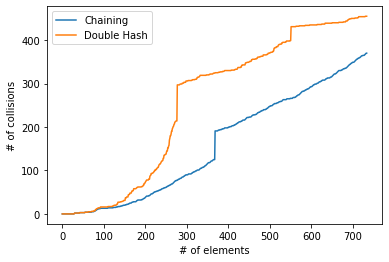

In [13]:
plot_collision()

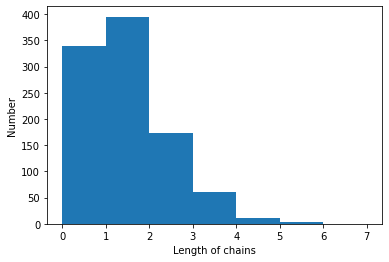

In [14]:
plot_chain_length()

### Describe and Discuss your answer

chaining은 collision이 더 적게 발생하지만 아래의 히스토그램과 같이 clustering 문제가 발생한다. 반면 double hash는 chaining보다는 collision이 많이 발생하지만 모든 slot을 probing하기 때문에 clustering 문제가 발생하지 않는다.

___